In [10]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

check the data :

In [12]:
df_credit = pd.read_csv("german_credit_data_with_target.csv" , index_col=0)


print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [3]:
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


An info that may be useful later on : Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

checking for unique values

In [4]:
print(df_credit.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


as the missing value are a more than a quarter of the collumn checking account, i will use another simple model to fill the model in correlation with the not missing values


In [27]:
df_credit = pd.read_csv("GCD_with_no_empty_values.csv",index_col=0)
df_credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,moderate,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


Creating dummy variables for the none numerical


In [20]:
df_credit.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [28]:
df_credit = pd.get_dummies(df_credit, columns=['Sex'] , drop_first= True)
df_credit = pd.get_dummies(df_credit, columns=['Housing', 'Saving accounts', 'Checking account', 'Purpose'])
df_credit = pd.get_dummies(df_credit, columns=['Risk'] , drop_first= True)

In [29]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_male                     1000 non-null   bool 
 5   Housing_free                 1000 non-null   bool 
 6   Housing_own                  1000 non-null   bool 
 7   Housing_rent                 1000 non-null   bool 
 8   Saving accounts_little       1000 non-null   bool 
 9   Saving accounts_moderate     1000 non-null   bool 
 10  Saving accounts_quite rich   1000 non-null   bool 
 11  Saving accounts_rich         1000 non-null   bool 
 12  Checking account_little      1000 non-null   bool 
 13  Checking account_moderate    1000 non-null   bool 
 14

let's check our target (good/bad clients) distribution

# Now time for some EDA

let's check our target (good/bad clients) distribution

Risk_good
True     700
False    300
Name: count, dtype: int64


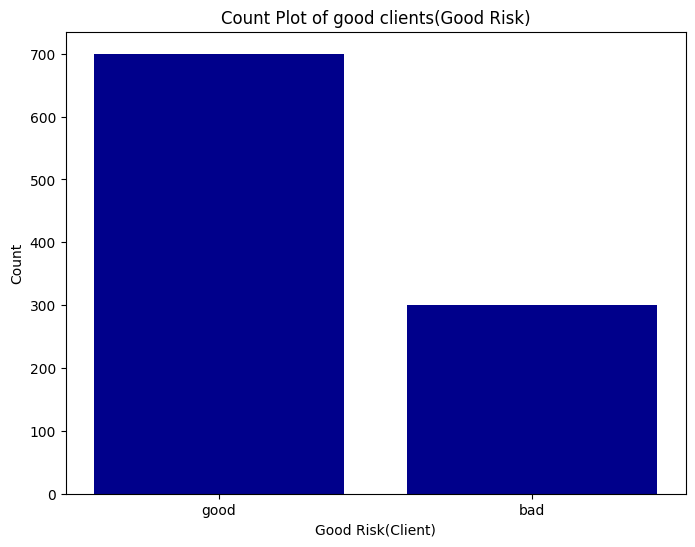

In [30]:
Risk_good = df_credit['Risk_good'].value_counts()
print(Risk_good)
# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(["good" , "bad"], Risk_good, color='darkblue')
plt.title('Count Plot of good clients(Good Risk)')
plt.xlabel('Good Risk(Client)')
plt.ylabel('Count')
plt.show()

an uneven distribution with around 2/3 of the values marqued as good risk

Let's check how skewed the values are , in other words , how is the distribution

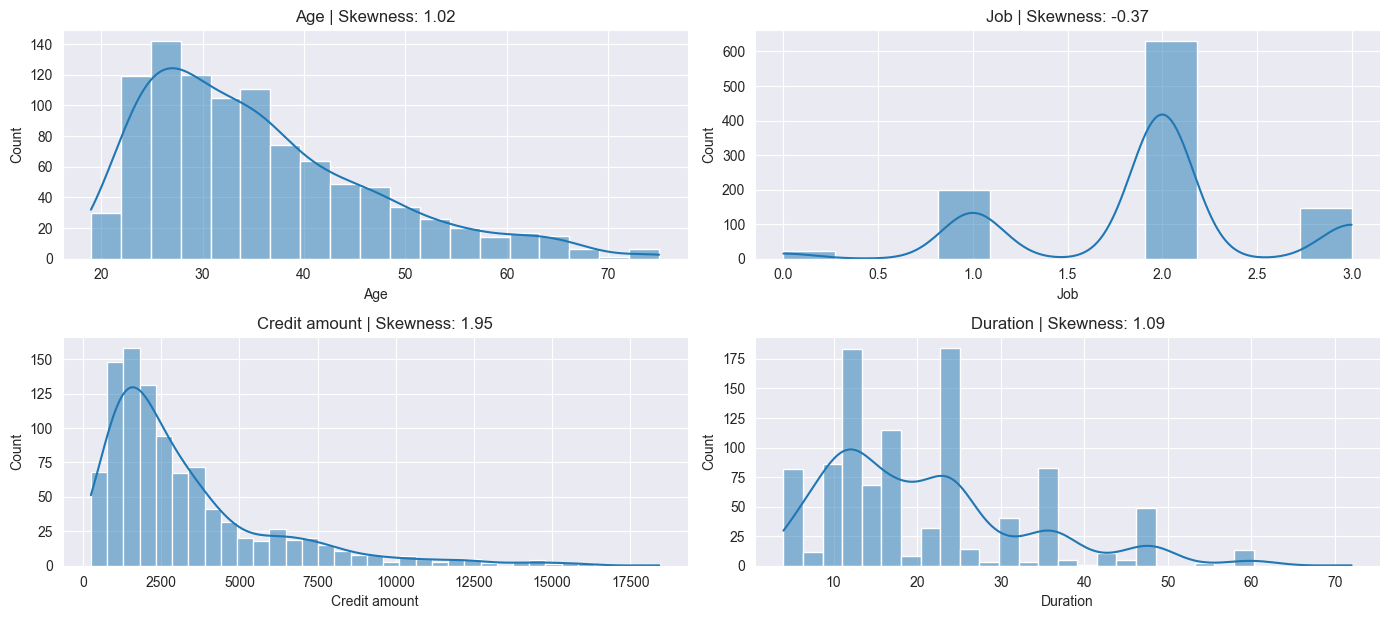

In [31]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df_credit.select_dtypes(include="int64").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df_credit[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df_credit[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()


From this we can assess that the job feature in close to symetrical distribution (close to 0).
While the reste is positively skewered, going for smaller values in general .
Generally young people(25~45) take a low amount of credit(2000~5000) for some years (1~2.5 years).
We can deduce a tendency for many low credits for low duration, especially for the younger generation.

C:\Users\msi\AppData\Local\Temp\ipykernel_1496\2978603320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Credit amount", y="Duration", data=df_credit, palette='viridis')
c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


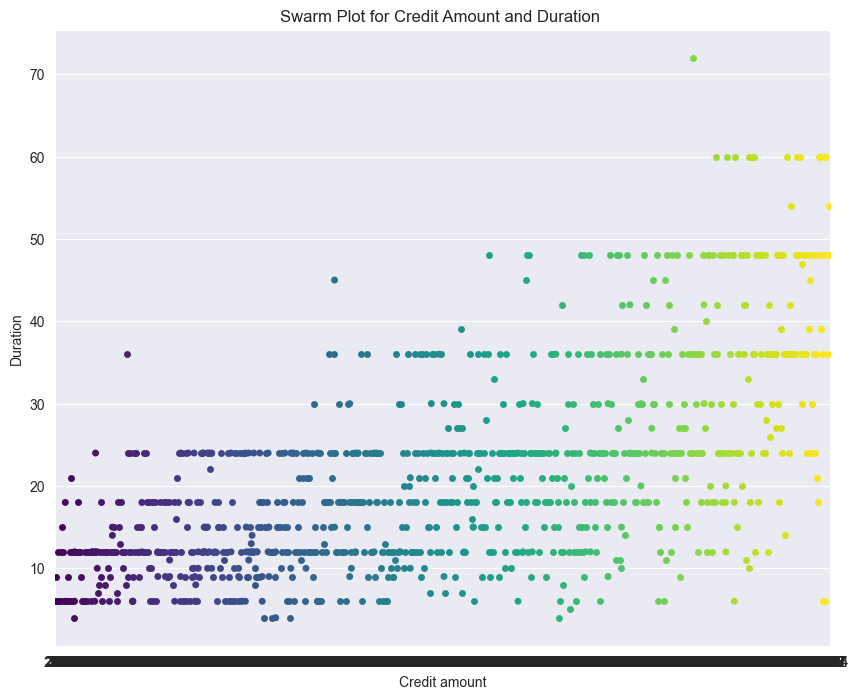

In [32]:
plt.figure(figsize=(10, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(x="Credit amount", y="Duration", data=df_credit, palette='viridis')

plt.title('Swarm Plot for Credit Amount and Duration ')
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

This Swarm is interessting and logical , we see a continuous realtion between duration and credit amount : the higher the credit amount , the longer the duration.

C:\Users\msi\AppData\Local\Temp\ipykernel_1496\2590349049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y="Credit amount", x="Job", data=df_credit, palette='viridis')
c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


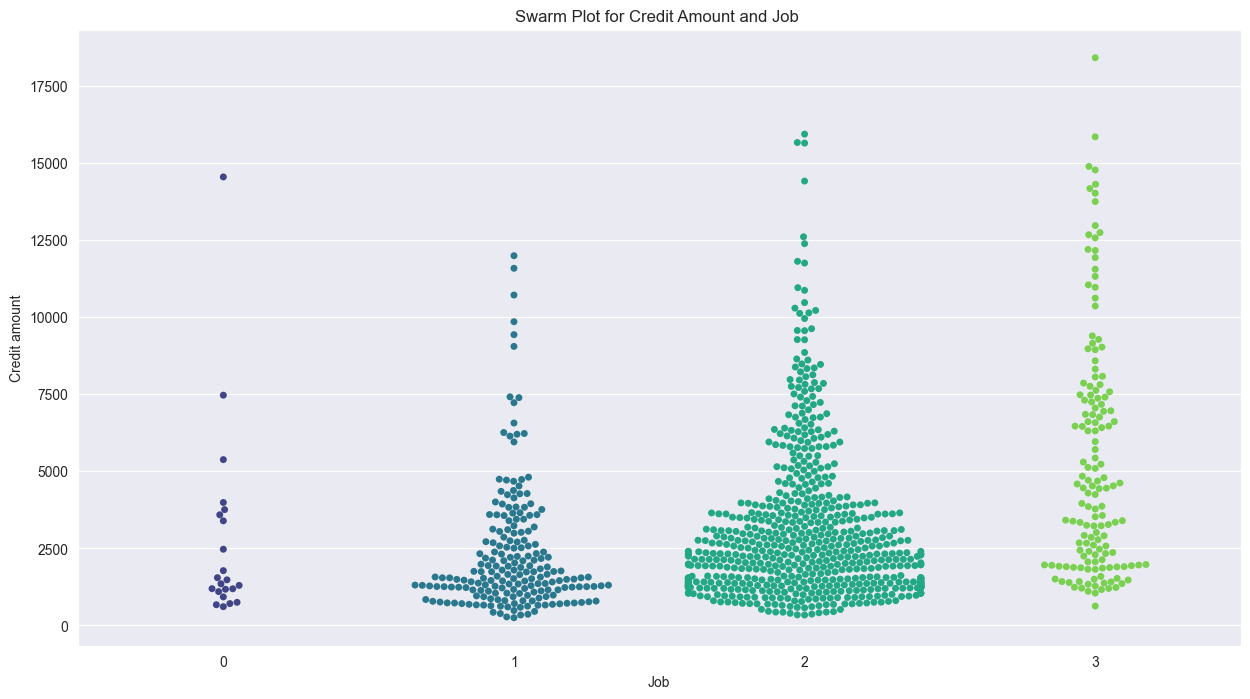

In [33]:
plt.figure(figsize=(15, 8))

# Using Seaborn to create a swarm plot
sns.swarmplot(y="Credit amount", x="Job", data=df_credit, palette='viridis')

plt.title('Swarm Plot for Credit Amount and Job ')
plt.ylabel('Credit amount')
plt.xlabel('Job')
plt.show()

Again a logical swarm distribution : the better the job , the  higher the mean credit ammount taken.

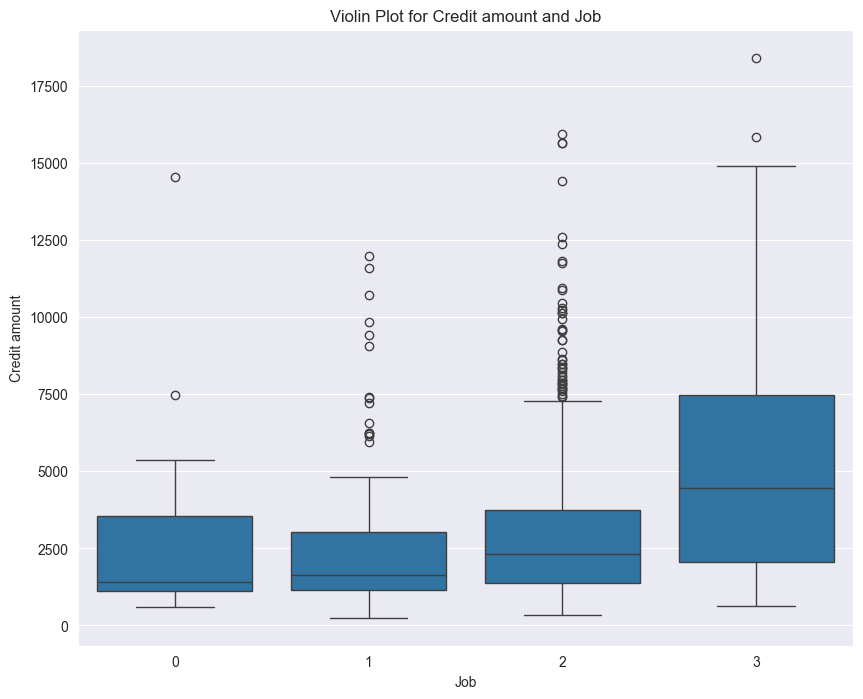

In [34]:

plt.figure(figsize=(10, 8))
#box plot
# Using Seaborn to create a violin plot
sns.boxplot(x="Job", y="Credit amount", data=df_credit)

plt.title('Violin Plot for Credit amount and Job')
plt.xlabel('Job')
plt.ylabel('Credit amount')
plt.show()

from the boxplot , we can deduce that the highly skilled (usually higher paying jobs) have generally a tendency to take bigger credits amounts , with how few there is outliers there , meanwhile the lower echellon ( less skilled and maybe even without a residence) have a higher tendency for lower amount credits , i nthe middle classmen , we can also observe a lot of outliers, implying that they still sometimes , take a higher amount credit , wich come with a lot of risk.

let's see the correlation between data with a sns.heatmap

In [35]:
df_credit = df_credit.astype('int64')
print(df_credit.info())
print (df_credit.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_male                     1000 non-null   int64
 5   Housing_free                 1000 non-null   int64
 6   Housing_own                  1000 non-null   int64
 7   Housing_rent                 1000 non-null   int64
 8   Saving accounts_little       1000 non-null   int64
 9   Saving accounts_moderate     1000 non-null   int64
 10  Saving accounts_quite rich   1000 non-null   int64
 11  Saving accounts_rich         1000 non-null   int64
 12  Checking account_little      1000 non-null   int64
 13  Checking account_moderate    1000 non-null   int64
 14

                                  Age       Job  Credit amount  Duration  \
Age                          1.000000  0.015673       0.032716 -0.036136   
Job                          0.015673  1.000000       0.285385  0.210910   
Credit amount                0.032716  0.285385       1.000000  0.624984   
Duration                    -0.036136  0.210910       0.624984  1.000000   
Sex_male                     0.161694  0.070298       0.093482  0.081432   
Housing_free                 0.253058  0.134972       0.201643  0.189117   
Housing_own                  0.006553 -0.059393      -0.117497 -0.075169   
Housing_rent                -0.212620 -0.039195      -0.024611 -0.064417   
Saving accounts_little       0.032699  0.027918       0.040903 -0.003714   
Saving accounts_moderate    -0.085470  0.002740       0.023962  0.064348   
Saving accounts_quite rich   0.031284 -0.036624      -0.053721 -0.030777   
Saving accounts_rich         0.025361 -0.016281      -0.052696 -0.051213   
Checking acc

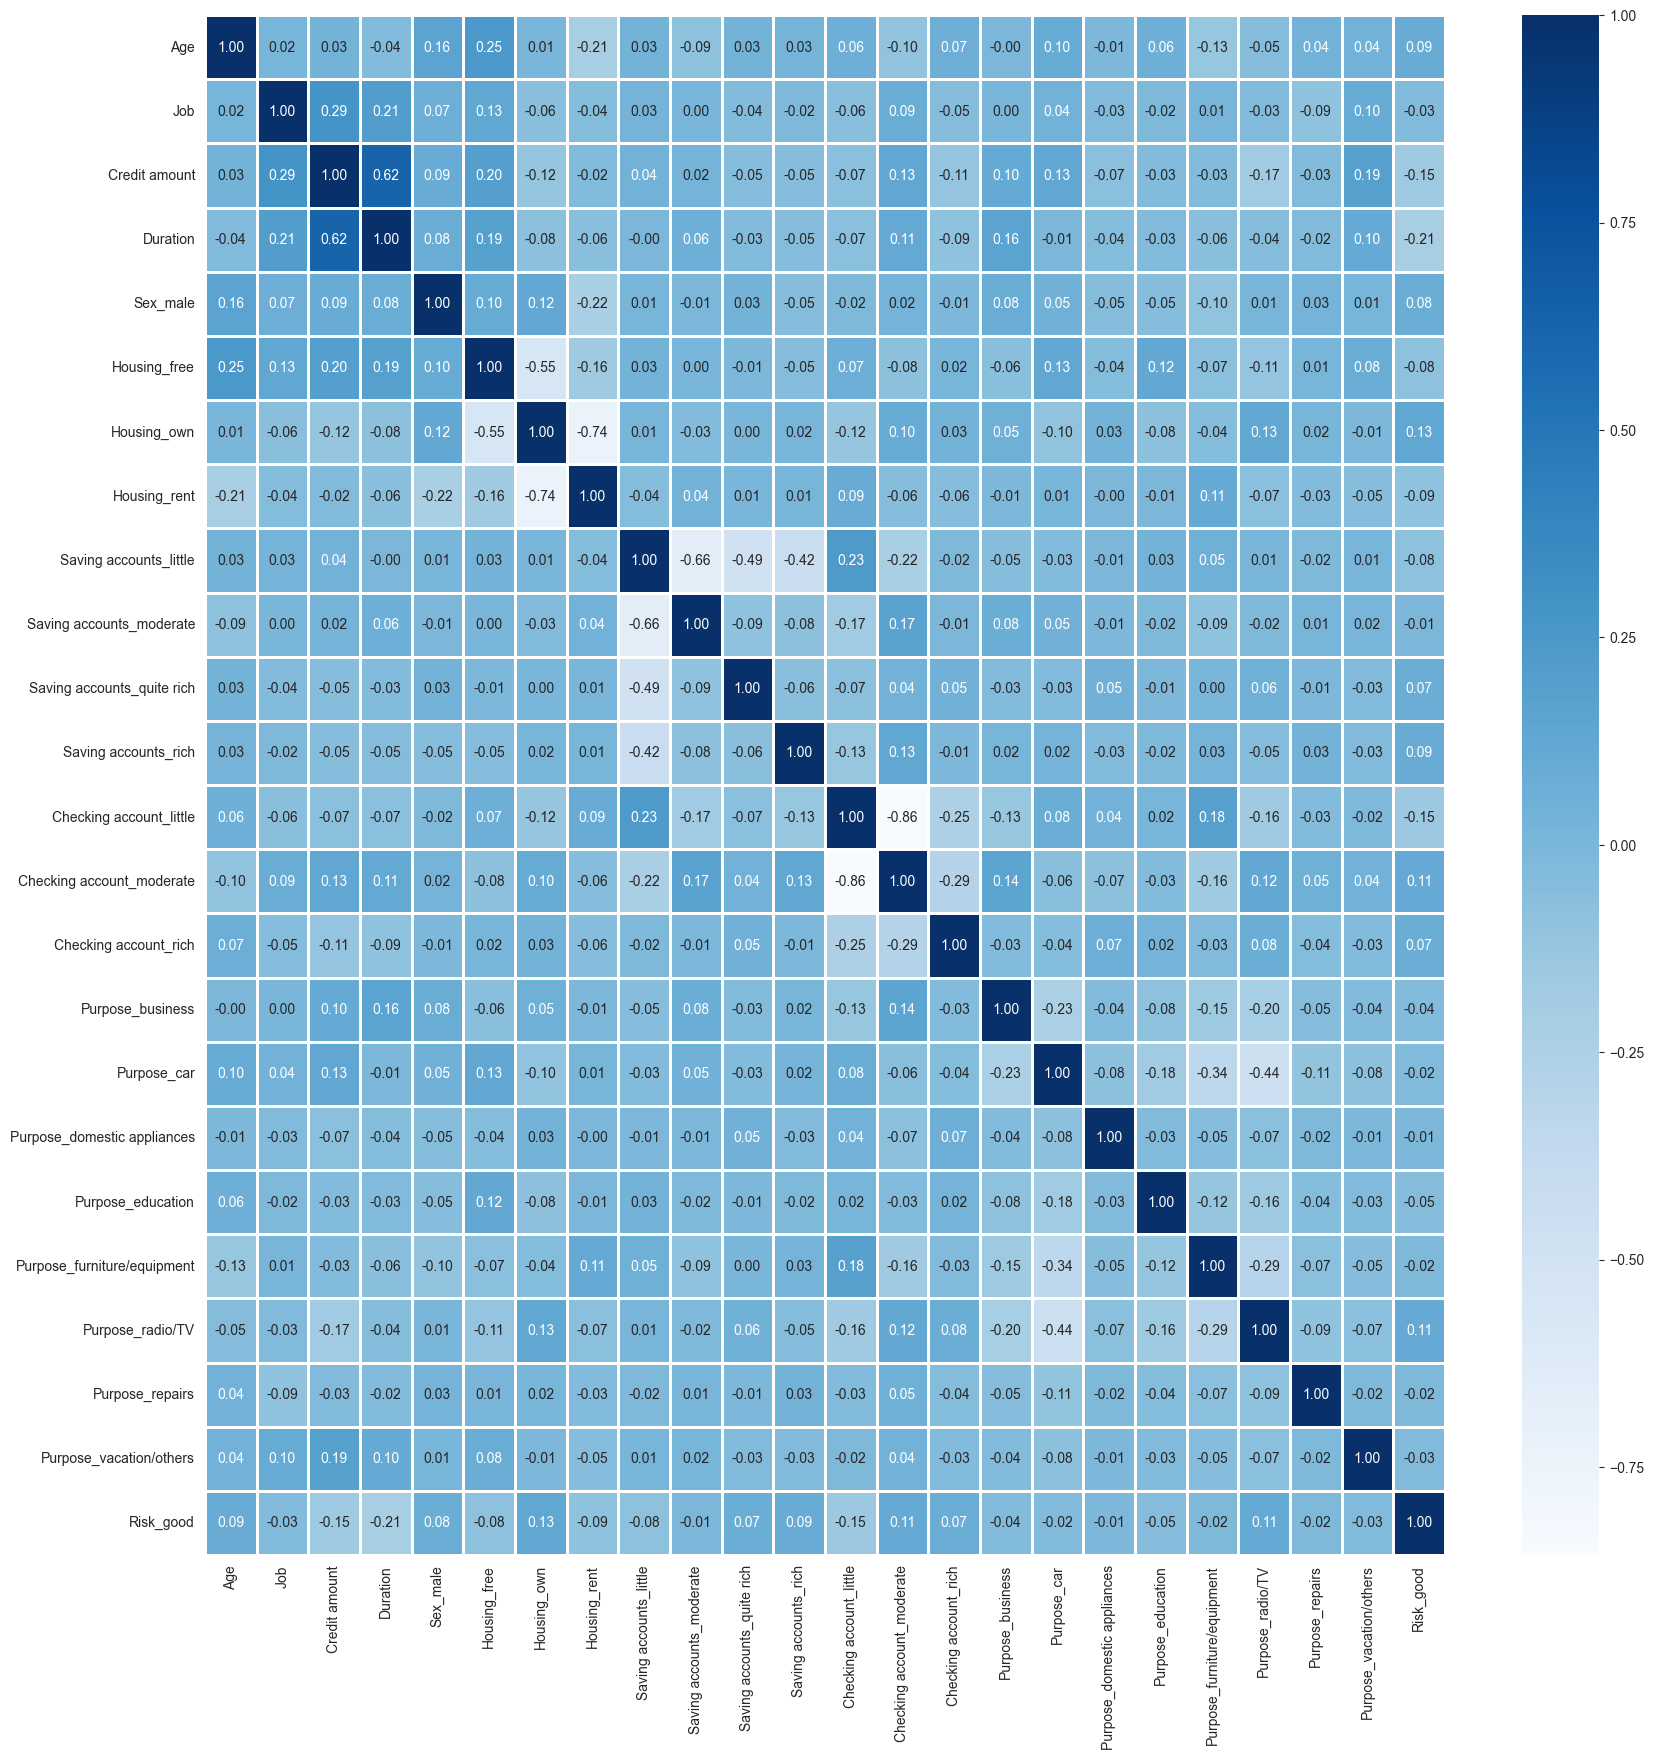

In [36]:
corr_matrix = df_credit.corr()
print (corr_matrix)
plt.figure(figsize=(20,20))
sns.heatmap(data=corr_matrix,annot=True, fmt='.2f', cmap='Blues', linewidths=2)
plt.show()

# Let's see what model would be the most interresting

Transform "Credit amount" with log


In [37]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

Separate features and target


In [38]:
X = df_credit.drop(columns='Risk_good')
y = df_credit['Risk_good']

In [39]:
X

,Age,Job,Credit amount,Duration,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,7.063904,6,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,22,2,8.691315,48,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,7.647786,12,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,8.972337,42,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,8.490849,24,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,7.459339,12,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,40,3,8.257645,30,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
997,38,2,6.689599,12,1,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
998,23,2,7.520235,45,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Split into training and testing sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train_balanced =X_train
y_train_balanced = y_train


Handle imbalanced data using SMOTE

In [41]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

Define the models to be evaluated

In [42]:
models = [
    ('LR', LogisticRegression()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('RF', RandomForestClassifier()),
    ('SVM', SVC(gamma='auto')),
    ('XGB', XGBClassifier())
]

# Evaluate each model using cross-validation

Class distribution in y_train_balanced:
Risk_good
1    525
0    525
Name: count, dtype: int64


c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

LR: 0.923911 (0.030545)
LDA: 0.910595 (0.026556)
KNN: 0.819013 (0.049475)
CART: 0.696843 (0.075410)
NB: 0.697315 (0.061278)
RF: 0.864804 (0.043425)
SVM: 0.954245 (0.021205)
XGB: 0.798149 (0.033903)


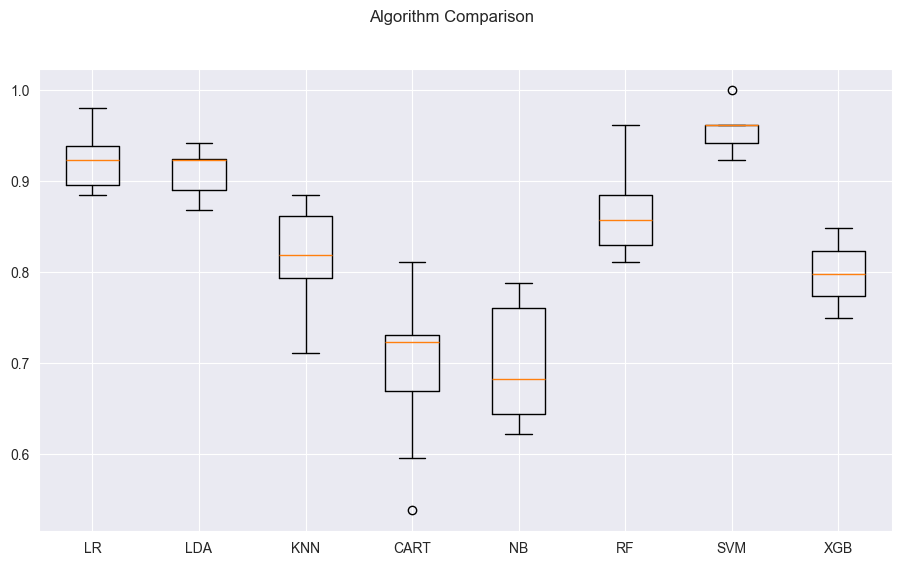

In [43]:
results = []
names = []
scoring = 'recall'
seed = 42

print("Class distribution in y_train_balanced:")
print(pd.Series(y_train_balanced).value_counts())

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#Boxplot for algorithm comparison
fig = plt.figure(figsize=(11, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# the order from the best to the worst is:
- SVC(gamma=auto) +
- Logistic Regression -
- Random Forest Classifier +
- Linear Discriminant Analysis -
- K-Neighbors Classifier -
- XGB Classifier +
- DecisionTreeClassifier +
- GaussianNB +

but knowing how few correlation are in our dataset, whe should focus on the models who handles well uncorrelation we end up with these three :
- SVC(gamma=auto) //
- Random Forest Classifier //
- XGB Classifier //


# time to train it with our parameters

# SVC(gamma=auto) :

In [44]:
svc= SVC(gamma='auto')

svc.fit(X_train, y_train)

SVC(gamma='auto')

# Random Forest Classifier :

In [45]:
rfc= RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

# XGB Classifier (XGBBoost) :

In [46]:
xgb= XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Let's show the result more neatly

In [47]:
#accuracy testing
print("Results of SVC( Gamma=auto)")
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("Results of Random Forest Classifier")
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("Results of XGBClassifier")
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")


Results of SVC( Gamma=auto)
[[ 10  65]
 [  8 167]]


              precision    recall  f1-score   support

           0       0.56      0.13      0.22        75
           1       0.72      0.95      0.82       175

    accuracy                           0.71       250
   macro avg       0.64      0.54      0.52       250
weighted avg       0.67      0.71      0.64       250



Results of Random Forest Classifier
[[ 27  48]
 [ 17 158]]


              precision    recall  f1-score   support

           0       0.61      0.36      0.45        75
           1       0.77      0.90      0.83       175

    accuracy                           0.74       250
   macro avg       0.69      0.63      0.64       250
weighted avg       0.72      0.74      0.72       250



Results of XGBClassifier
[[ 32  43]
 [ 22 153]]


              precision    recall  f1-score   support

           0       0.59      0.43      0.50        75
           1       0.78      0.87      0.82       175

    accuracy  

The best result overall was RandomForestClassifier (RFC)
To get better results , a grid search would be helpful to search for the possibly best hyperparameters

Let's search for the best hyper parameters:

In [50]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50], # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at each leaf node
    'bootstrap': [True, False] ,              # Method of selecting samples for training each tree
    'class_weight': [None, 'balanced', 'balanced_subsample']
}


# Create a scoring function for recall
recall_scorer = make_scorer(recall_score, average='macro')

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2 , scoring=recall_scorer)
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
# Get the best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


In [51]:
#accuracy testing
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print("accuracy" , best_model.score(X , y))

[[ 36  39]
 [ 36 139]]


              precision    recall  f1-score   support

           0       0.50      0.48      0.49        75
           1       0.78      0.79      0.79       175

    accuracy                           0.70       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.70      0.70      0.70       250



accuracy 0.798


Let's try with XGBClassifier as it also looks  like a good starter :

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [3, 6, 10, 20],               # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage used to prevent overfitting
    'subsample': [0.5, 0.7, 1.0],              # Subsample ratio of the training instances
    'colsample_bytree': [0.5, 0.7, 1.0],       # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                    # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.01, 0.1, 1],            # L1 regularization term on weights
    'reg_lambda': [1, 0.1, 0.01, 0.001],       # L2 regularization term on weights
}


# Create a scoring function for recall
recall_scorer = make_scorer(recall_score, average='macro')

# Initialize the XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=recall_scorer)

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
# Get the best model
best_modelXGB = grid_search.best_estimator_

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits
Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.01, 'reg_lambda': 0.001, 'subsample': 0.7}


c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [13:06:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# accuracy testing
y_pred = best_modelXGB.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print("accuracy" , best_modelXGB.score(X , y))

[[ 22  53]
 [ 22 153]]


              precision    recall  f1-score   support

           0       0.50      0.29      0.37        75
           1       0.74      0.87      0.80       175

    accuracy                           0.70       250
   macro avg       0.62      0.58      0.59       250
weighted avg       0.67      0.70      0.67       250



accuracy 0.877


the XGB  may seem generally better since accuracy take into consideration also the precision, but as we decided that we mainly focus on recall , we will choose RandomForestClassifier ( we want to be able to detect all possible good credit risks even at the expense of some false positives)

Let's persist the random forest result with pickle:

In [67]:

Bestrfc = RandomForestClassifier(bootstrap = True, max_depth= 10, max_features= 'log2', min_samples_leaf= 4, min_samples_split= 2, n_estimators= 50 , class_weight='balanced_subsample')
#Best parameters found:  {'bootstrap': True, 'class_weight': 'balanced_subsample', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Bestrfc.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features='log2', min_samples_leaf=4,
                       n_estimators=50)

In [68]:
# #accuracy testing
y_pred = Bestrfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print("accuracy" , Bestrfc.score(X , y))    

[[ 35  40]
 [ 29 146]]


              precision    recall  f1-score   support

           0       0.55      0.47      0.50        75
           1       0.78      0.83      0.81       175

    accuracy                           0.72       250
   macro avg       0.67      0.65      0.66       250
weighted avg       0.71      0.72      0.72       250



accuracy 0.812


In [69]:
pickle.dump(Bestrfc , open ('RFCModelNew2.pkl' , 'wb'))

let's see if it was correctly dumped

In [70]:
model = pickle.load( open('RFCModelNew2.pkl' , 'rb'))

In [71]:
#accuracy testing
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print("accuracy" , model.score(X , y))

[[ 35  40]
 [ 29 146]]


              precision    recall  f1-score   support

           0       0.55      0.47      0.50        75
           1       0.78      0.83      0.81       175

    accuracy                           0.72       250
   macro avg       0.67      0.65      0.66       250
weighted avg       0.71      0.72      0.72       250



accuracy 0.812


everything working correctly !

Let's check the feature importance:

In [72]:
import shap

c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [73]:
importances = model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

                        Feature  Gini Importance
2                 Credit amount         0.199249
0                           Age         0.190977
3                      Duration         0.189194
12      Checking account_little         0.052437
20             Purpose_radio/TV         0.045751
6                   Housing_own         0.036041
13    Checking account_moderate         0.034131
4                      Sex_male         0.033603
1                           Job         0.030420
8        Saving accounts_little         0.026218
16                  Purpose_car         0.025954
19  Purpose_furniture/equipment         0.019484
9      Saving accounts_moderate         0.018347
15             Purpose_business         0.017573
7                  Housing_rent         0.017269
11         Saving accounts_rich         0.014160
14        Checking account_rich         0.012889
10   Saving accounts_quite rich         0.012375
18            Purpose_education         0.009745
5                  H

Let's try to visualize is more clearly

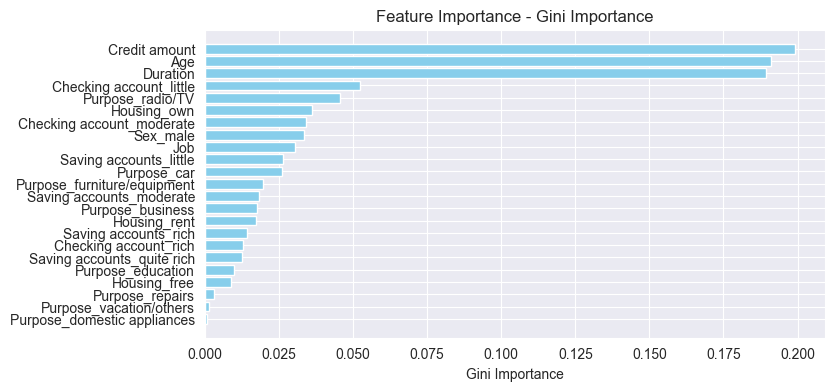

In [74]:
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


# Next step now it to use our persisted modele with a streamlit app